In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import geopandas as gp
import pycountry

import sys

sys.path.insert(0, "../Notebooks/Functions")
from StatsFunctions import MyFunctions as MF


In [13]:
DF = pd.read_csv("../Data/avgIQpercountry.csv")

In [28]:
DF = DF.astype({"Population": "float64"})

In [29]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         193 non-null    int64  
 1   Country      193 non-null    object 
 2   IQ           193 non-null    float64
 3   Continent    193 non-null    object 
 4   Literacy     193 non-null    float64
 5   Nobels       193 non-null    int64  
 6   HDI          179 non-null    float64
 7   SchoolYears  179 non-null    float64
 8    GNI - 2021  179 non-null    float64
 9   Population   193 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 15.2+ KB


In [34]:
DF.rename({"Average IQ": "IQ", "Literacy Rate": "Literacy", "Nobel Prices": "Nobels", "HDI (2021)": "HDI", "Mean years of schooling - 2021": "SchoolYears", " GNI - 2021": "GNI", "Population - 2023": "Population"}, axis=1, inplace=True)

In [35]:
DF.head()

,Rank,Country,IQ,Continent,Literacy,Nobels,HDI,SchoolYears,GNI,Population
0,1,Japan,106.48,Asia,0.99,29,0.925,13.4,42274.0,1.232945e+08
1,2,Taiwan,106.47,Asia,0.96,4,NaN,NaN,NaN,1.014354e+07
2,3,Singapore,105.89,Asia,0.97,0,0.939,11.9,90919.0,6.014723e+06
3,4,Hong Kong,105.37,Asia,0.94,1,0.952,12.2,62607.0,7.491609e+06
4,5,China,104.10,Asia,0.96,8,0.768,7.6,17504.0,1.425671e+09


In [32]:
Continents = DF.groupby("Continent").agg({"Literacy": MF.mean, "Population": "sum", "Nobels": "sum"})

In [53]:
less_10 = DF.query("Population < 10000000").groupby("Continent").agg({"Literacy": MF.mean, "Population": "sum", "Nobels": "sum"}).sum()
over_10 = DF.query("Population > 10000000").groupby("Continent").agg({"Literacy": MF.mean, "Population": "sum", "Nobels": "sum"})



In [72]:
fig = px.sunburst(DF.query("Population > 50_000_000"), path = ["Continent", "Country"], values = "Population", width=1000, height= 600, title="Countries by population")
fig.show()

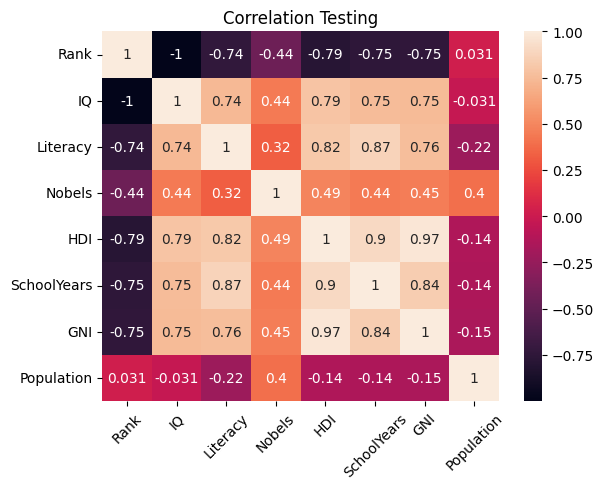

In [84]:
sns.heatmap(DF.select_dtypes(include=np.number).corr(method = 'spearman'), annot = True) #tk change heatmap for my example
plt.title("Correlation Testing")
plt.xticks(rotation=45) 
plt.show()

In [101]:
DF

,Rank,Country,IQ,Continent,Literacy,Nobels,HDI,SchoolYears,GNI,Population
0,1,Japan,106.48,Asia,0.99,29,0.925,13.4,42274.0,1.232945e+08
1,2,Taiwan,106.47,Asia,0.96,4,NaN,NaN,NaN,1.014354e+07
2,3,Singapore,105.89,Asia,0.97,0,0.939,11.9,90919.0,6.014723e+06
3,4,Hong Kong,105.37,Asia,0.94,1,0.952,12.2,62607.0,7.491609e+06
4,5,China,104.10,Asia,0.96,8,0.768,7.6,17504.0,1.425671e+09
...,...,...,...,...,...,...,...,...,...,...
188,189,Gambia,52.68,Africa,0.58,0,0.500,4.6,2172.0,2.773168e+06
189,190,Guatemala,47.72,Central America,0.79,2,0.627,5.7,8723.0,1.809203e+07
190,191,Liberia,45.07,Africa,0.48,2,0.481,5.1,1289.0,5.418377e+06
191,192,Sierra Leone,45.07,Africa,0.48,0,0.477,4.6,1622.0,8.791092e+06


Text(0.5, 1.0, 'Distribution of average IQ')

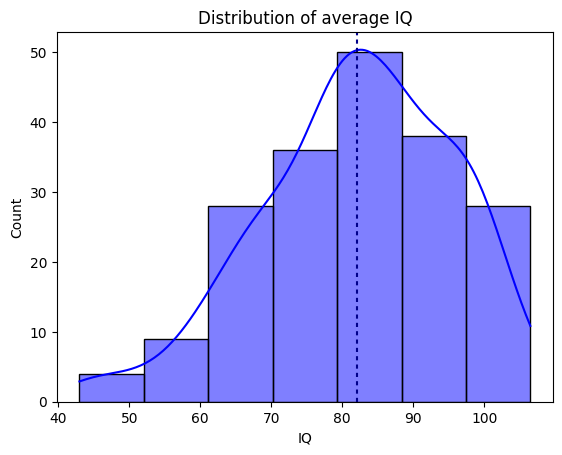

In [166]:
histIQ = sns.histplot(DF, x = 'IQ', bins = 7, kde = True, color = 'blue')
plt.axvline(DF["IQ"].mean(), color="darkblue", label="mean", dashes=(2, 2)) #TK change mean to my function
plt.title("Distribution of average IQ")


In [129]:
DF.head()

,Rank,Country,IQ,Continent,Literacy,Nobels,HDI,SchoolYears,GNI,Population,CODE
0,1,Japan,106.48,Asia,0.99,29,0.925,13.4,42274.0,1.232945e+08,JPN
1,2,Taiwan,106.47,Asia,0.96,4,NaN,NaN,NaN,1.014354e+07,None
2,3,Singapore,105.89,Asia,0.97,0,0.939,11.9,90919.0,6.014723e+06,SGP
3,4,Hong Kong,105.37,Asia,0.94,1,0.952,12.2,62607.0,7.491609e+06,HKG
4,5,China,104.10,Asia,0.96,8,0.768,7.6,17504.0,1.425671e+09,CHN


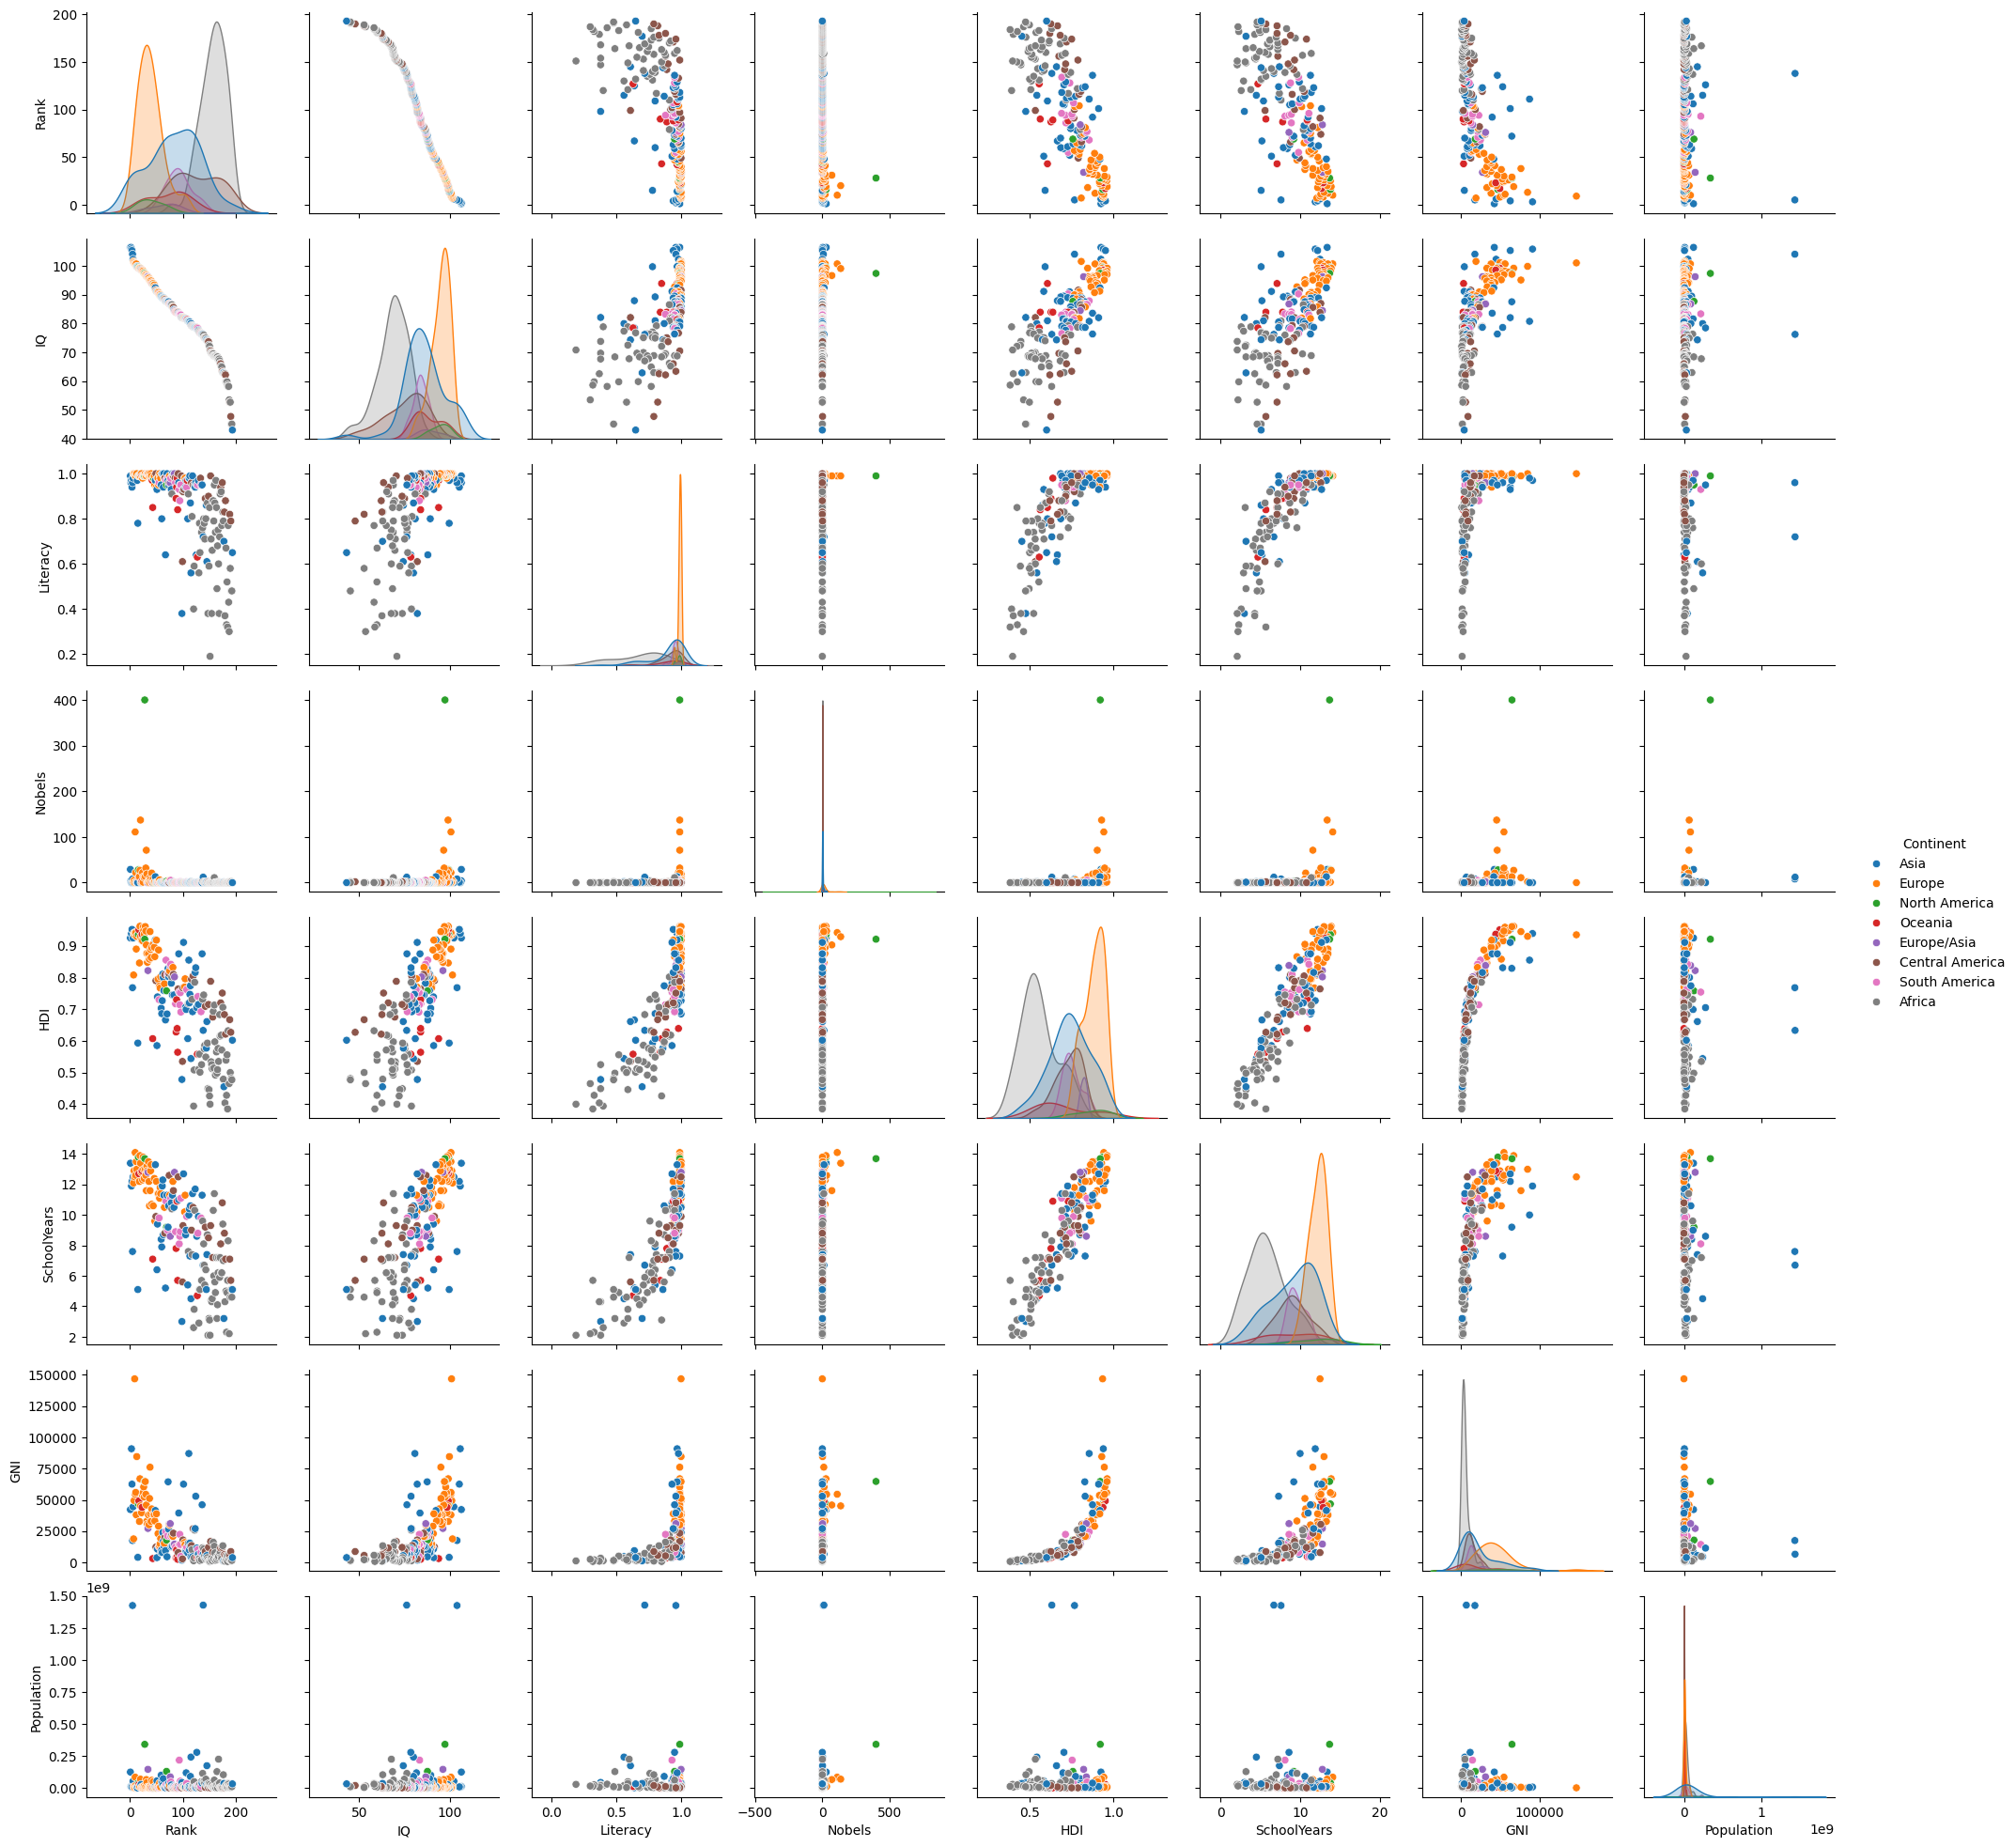

In [133]:
sns.pairplot(DF[["IQ", "Literacy", "Nobels" ,"HDI", "Continent","SchoolYears","GNI", ]], hue = "Continent")

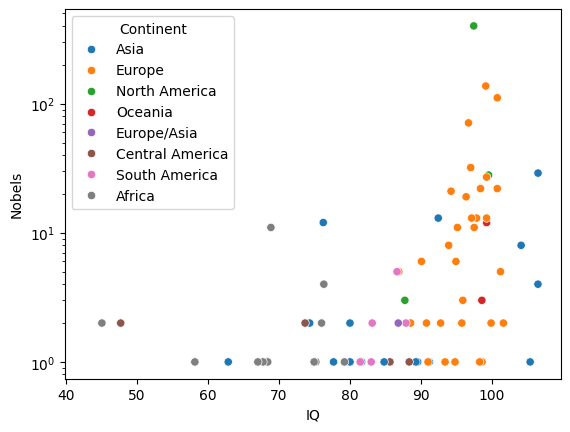

In [138]:
sns.scatterplot(data = DF, x = "IQ", y = "Nobels", hue= "Continent")
plt.yscale('log')

Text(0.5, 1.0, 'Distribution of IQ for each continent')

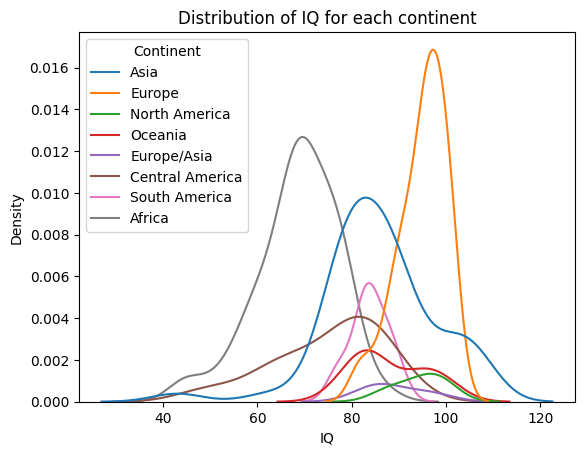

In [167]:
sns.kdeplot(data = DF, x = "IQ", hue = "Continent")
plt.title("Distribution of IQ for each continent")

<Axes: xlabel='HDI', ylabel='GNI'>

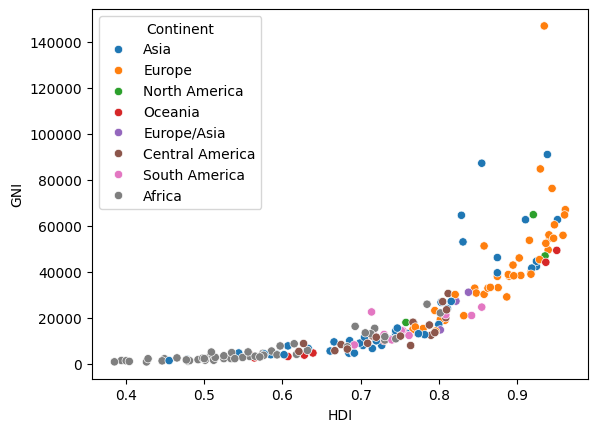

In [171]:
sns.scatterplot(data = DF, y = "GNI", x = "HDI", hue = "Continent") #TK
